In [1]:
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import xarray as xr
import numpy as np
import pandas as pd
import re

In [2]:
def increment_number_in_string(input_string):
    # Use regular expression to find the number in the string
    pattern = r'\d+'
    match = re.search(pattern, input_string)

    if match:
        # Extract the matched number
        number_str = match.group(0)
        # Convert it to an integer, increment by 1, and convert it back to a string
        incremented_number = str(int(number_str) + 1)

        # Replace the matched number with the incremented number in the original string
        result_string = re.sub(pattern, incremented_number, input_string, count=1)
        return result_string
    else:
        # If no number was found in the string, return the original string
        return input_string

In [3]:
SIZE = 25
plt.rcParams['axes.labelsize']  = SIZE
plt.rcParams['legend.fontsize'] = SIZE
plt.rcParams['xtick.labelsize'] = SIZE
plt.rcParams['ytick.labelsize'] = SIZE
plt.rcParams['font.size']       = SIZE

In [4]:
OCEAN_TYPES = ['atlantic' , 'western_pacific', 'central_pacific', 'eastern_pacific', 'indian_ocean']
SEASONS = ['MAM', 'JJA', 'SON', 'DJF']
YEARS = ['2020', '2021', '2022']

# Initialize an empty list to store DataFrame rows
rows = []

for ocean_type in OCEAN_TYPES:
    for year in YEARS:
        for season in SEASONS:
            if season == 'DJF':
                year = increment_number_in_string(year)
            else:
                year = year
            if season == 'MAM' and year == '2022':
                break
            print(ocean_type, year, season)

            # Loading Data
            datapath = "/work/mh0731/m300868/00_DATA/Paper_Data_Revised/"

            # Load other data
            ZM_uu_wind_icon_orig = np.load(datapath + f'fig_08_data/{ocean_type}/08_fig_ZM_uu_wind_icon_orig_{ocean_type}_{year}_{season}.npy')
            ZM_uu_RFM = np.load(datapath + f'fig_08_data/{ocean_type}/08_fig_ZM_uu_RFM_{ocean_type}_{year}_{season}.npy')
            ZM_uu_wind_revised = np.load(datapath + f'fig_08_data/{ocean_type}/08_fig_ZM_uu_wind_revised_{ocean_type}_{year}_{season}.npy')

            ZM_vv_wind_icon_orig = np.load(datapath + f'fig_08_data/{ocean_type}/08_fig_ZM_vv_wind_icon_orig_{ocean_type}_{year}_{season}.npy')
            ZM_vv_RFM = np.load(datapath + f'fig_08_data/{ocean_type}/08_fig_ZM_vv_RFM_{ocean_type}_{year}_{season}.npy')
            ZM_vv_wind_revised = np.load(datapath + f'fig_08_data/{ocean_type}/08_fig_ZM_vv_wind_revised_{ocean_type}_{year}_{season}.npy')

            # Compute RMSE for zonal winds
            control_array = ZM_uu_wind_icon_orig
            array1 = ZM_uu_RFM
            array2 = ZM_uu_wind_revised

            if control_array.shape == array1.shape == array2.shape:
                rmse_uu_icon_vs_RFM = np.sqrt(np.mean((control_array - array1) ** 2))
                rmse_uu_icon_vs_WIN = np.sqrt(np.mean((control_array - array2) ** 2))
            else:
                print("Error: Zonal wind arrays do not have the same shape. Cannot compute RMSE.")
                rmse_uu_icon_vs_RFM = rmse_uu_icon_vs_WIN = np.nan

            # Compute RMSE for meridional winds
            control_array = ZM_vv_wind_icon_orig
            array1 = ZM_vv_RFM
            array2 = ZM_vv_wind_revised

            if control_array.shape == array1.shape == array2.shape:
                rmse_vv_icon_vs_RFM = np.sqrt(np.mean((control_array - array1) ** 2))
                rmse_vv_icon_vs_WIN = np.sqrt(np.mean((control_array - array2) ** 2))
            else:
                print("Error: Meridional wind arrays do not have the same shape. Cannot compute RMSE.")
                rmse_vv_icon_vs_RFM = rmse_vv_icon_vs_WIN = np.nan

            # Append results to list
            rows.append({
                'Ocean_Type': ocean_type,
                'Year': year,
                'Season': season,
                'rmse_uu_icon_vs_RFM': rmse_uu_icon_vs_RFM,
                'rmse_uu_icon_vs_WIN': rmse_uu_icon_vs_WIN,
                'rmse_vv_icon_vs_RFM': rmse_vv_icon_vs_RFM,
                'rmse_vv_icon_vs_WIN': rmse_vv_icon_vs_WIN
            })

# Convert the list of rows to a DataFrame
RMSE_values = pd.DataFrame(rows)
RMSE_values

atlantic 2020 MAM
atlantic 2020 JJA
atlantic 2020 SON
atlantic 2021 DJF
atlantic 2021 MAM
atlantic 2021 JJA
atlantic 2021 SON
atlantic 2022 DJF
western_pacific 2020 MAM
western_pacific 2020 JJA
western_pacific 2020 SON
western_pacific 2021 DJF
western_pacific 2021 MAM
western_pacific 2021 JJA
western_pacific 2021 SON
western_pacific 2022 DJF
central_pacific 2020 MAM
central_pacific 2020 JJA
central_pacific 2020 SON
central_pacific 2021 DJF
central_pacific 2021 MAM
central_pacific 2021 JJA
central_pacific 2021 SON
central_pacific 2022 DJF
eastern_pacific 2020 MAM
eastern_pacific 2020 JJA
eastern_pacific 2020 SON
eastern_pacific 2021 DJF
eastern_pacific 2021 MAM
eastern_pacific 2021 JJA
eastern_pacific 2021 SON
eastern_pacific 2022 DJF
indian_ocean 2020 MAM
indian_ocean 2020 JJA
indian_ocean 2020 SON
indian_ocean 2021 DJF
indian_ocean 2021 MAM
indian_ocean 2021 JJA
indian_ocean 2021 SON
indian_ocean 2022 DJF


,Ocean_Type,Year,Season,rmse_uu_icon_vs_RFM,rmse_uu_icon_vs_WIN,rmse_vv_icon_vs_RFM,rmse_vv_icon_vs_WIN
0,atlantic,2020,MAM,2.411171,1.296596,2.511274,1.563443
1,atlantic,2020,JJA,4.520291,3.016785,7.875175,4.244823
2,atlantic,2020,SON,6.554511,2.752466,21.069290,3.516940
3,atlantic,2021,DJF,2.971842,2.708534,4.888371,1.805262
4,atlantic,2021,MAM,2.197385,1.064420,2.512461,8.508746
5,atlantic,2021,JJA,2.871752,3.013902,4.335619,4.493050
6,atlantic,2021,SON,6.248171,2.969017,22.363480,3.680012
7,atlantic,2022,DJF,3.185822,3.035651,2.773852,2.105023
8,western_pacific,2020,MAM,6.087653,1.589862,1.097659,0.768137
9,western_pacific,2020,JJA,7.426476,2.350381,1.827589,1.920810


In [5]:
# Save the DataFrame to a CSV file
#rmse_df.to_csv(f'/work/mh0731/m300868/00_DATA/Paper_Data_Revised/RMSE_values_combined.csv', index=True)

In [6]:
wind_pattern = pd.read_csv(f'/work/mh0731/m300868/00_DATA/Paper_Data_Revised/what_wind_pattern.csv', index_col=0)
wind_pattern

,Ocean_Type,Year,Season,Wind Pattern
0,indian_ocean,2020,MAM,Zonal Wind Pattern
1,western_pacific,2020,MAM,Zonal Wind Pattern
2,central_pacific,2020,MAM,Zonal Wind Pattern
3,eastern_pacific,2020,MAM,Meridional Wind Pattern
4,atlantic,2020,MAM,Meridional Wind Pattern
5,indian_ocean,2020,JJA,Meridional Wind Pattern
6,western_pacific,2020,JJA,Zonal Wind Pattern
7,central_pacific,2020,JJA,Zonal Wind Pattern
8,eastern_pacific,2020,JJA,Meridional Wind Pattern
9,atlantic,2020,JJA,Meridional Wind Pattern


In [7]:
import pandas as pd

# Convert 'Year' column to string in both DataFrames
wind_pattern['Year'] = wind_pattern['Year'].astype(str)
RMSE_values['Year'] = RMSE_values['Year'].astype(str)

# Create the SELECTED_values DataFrame
selected_values = []

# Iterate over the wind_pattern DataFrame
for _, row in wind_pattern.iterrows():
    ocean_type = row['Ocean_Type']
    year = row['Year']
    season = row['Season']
    wind_pattern_type = row['Wind Pattern']

    # Filter RMSE_values based on matching Ocean_Type, Year, and Season
    rmse_row = RMSE_values[
        (RMSE_values['Ocean_Type'] == ocean_type) &
        (RMSE_values['Year'] == year) &
        (RMSE_values['Season'] == season)
    ]

    # Check if the filtered row exists
    if not rmse_row.empty:
        if wind_pattern_type == "Zonal Wind Pattern":
            selected_values.append({
                "Ocean_Type": ocean_type,
                "Year": year,
                "Season": season,
                "Wind Pattern": wind_pattern_type,
                "RMSE_RFM": rmse_row.iloc[0]["rmse_uu_icon_vs_RFM"],
                "RMSE_WIN": rmse_row.iloc[0]["rmse_uu_icon_vs_WIN"]
            })
        elif wind_pattern_type == "Meridional Wind Pattern":
            selected_values.append({
                "Ocean_Type": ocean_type,
                "Year": year,
                "Season": season,
                "Wind Pattern": wind_pattern_type,
                "RMSE_RFM": rmse_row.iloc[0]["rmse_vv_icon_vs_RFM"],
                "RMSE_WIN": rmse_row.iloc[0]["rmse_vv_icon_vs_WIN"]
            })

# Convert the list of selected values to a DataFrame
SELECTED_values = pd.DataFrame(selected_values)
SELECTED_values

,Ocean_Type,Year,Season,Wind Pattern,RMSE_RFM,RMSE_WIN
0,indian_ocean,2020,MAM,Zonal Wind Pattern,1.664176,1.401244
1,western_pacific,2020,MAM,Zonal Wind Pattern,6.087653,1.589862
2,central_pacific,2020,MAM,Zonal Wind Pattern,7.428630,4.406718
3,eastern_pacific,2020,MAM,Meridional Wind Pattern,18.495274,5.336610
4,atlantic,2020,MAM,Meridional Wind Pattern,2.511274,1.563443
5,indian_ocean,2020,JJA,Meridional Wind Pattern,3.593900,4.279572
6,western_pacific,2020,JJA,Zonal Wind Pattern,7.426476,2.350381
7,central_pacific,2020,JJA,Zonal Wind Pattern,9.831902,4.036152
8,eastern_pacific,2020,JJA,Meridional Wind Pattern,31.413254,8.058572
9,atlantic,2020,JJA,Meridional Wind Pattern,7.875175,4.244823


In [8]:
# Define the custom order for Ocean_Type
ocean_order = ["atlantic", "indian_ocean", "western_pacific", "central_pacific", "eastern_pacific"]

# Define the custom order for Season
season_order = ["MAM", "JJA", "SON", "DJF"]

# Add a helper column to enforce the custom order for Ocean_Type
SELECTED_values['Ocean_Type_order'] = SELECTED_values['Ocean_Type'].apply(lambda x: ocean_order.index(x))

# Add a helper column to enforce the custom order for Season
SELECTED_values['Season_order'] = SELECTED_values['Season'].apply(lambda x: season_order.index(x))

# Sort by Ocean_Type, Season, and Year
SELECTED_values = SELECTED_values.sort_values(
    by=["Ocean_Type_order", "Year", "Season_order"],
    ascending=[True, True, True]
)

# Drop the helper columns after sorting
SELECTED_values = SELECTED_values.drop(columns=["Ocean_Type_order", "Season_order"])
SELECTED_values

,Ocean_Type,Year,Season,Wind Pattern,RMSE_RFM,RMSE_WIN
4,atlantic,2020,MAM,Meridional Wind Pattern,2.511274,1.563443
9,atlantic,2020,JJA,Meridional Wind Pattern,7.875175,4.244823
14,atlantic,2020,SON,Meridional Wind Pattern,21.069290,3.516940
24,atlantic,2021,MAM,Meridional Wind Pattern,2.512461,8.508746
29,atlantic,2021,JJA,Meridional Wind Pattern,4.335619,4.493050
34,atlantic,2021,SON,Meridional Wind Pattern,22.363480,3.680012
19,atlantic,2021,DJF,Meridional Wind Pattern,4.888371,1.805262
39,atlantic,2022,DJF,Zonal Wind Pattern,3.185822,3.035651
0,indian_ocean,2020,MAM,Zonal Wind Pattern,1.664176,1.401244
5,indian_ocean,2020,JJA,Meridional Wind Pattern,3.593900,4.279572


### Sorted by Wind Pattern

In [9]:
wPcf_zonal_wind_pattern_ICON_vs_RFM = SELECTED_values.loc[
    (SELECTED_values['Ocean_Type'] == 'western_pacific'),
    'RMSE_RFM'
].values 

wPcf_zonal_wind_pattern_ICON_vs_WIN = SELECTED_values.loc[
    (SELECTED_values['Ocean_Type'] == 'western_pacific'),
    'RMSE_WIN'
].values 

In [10]:
cPcf_zonal_wind_pattern_ICON_vs_RFM = SELECTED_values.loc[
    (SELECTED_values['Ocean_Type'] == 'central_pacific'),
    'RMSE_RFM'
].values 

cPcf_zonal_wind_pattern_ICON_vs_WIN = SELECTED_values.loc[
    (SELECTED_values['Ocean_Type'] == 'central_pacific'),
    'RMSE_WIN'
].values 

In [11]:
IO_zonal_wind_pattern_ICON_vs_RFM = SELECTED_values.loc[
    (SELECTED_values['Ocean_Type'] == 'indian_ocean'),
    'RMSE_RFM'
].values 

IO_zonal_wind_pattern_ICON_vs_WIN = SELECTED_values.loc[
    (SELECTED_values['Ocean_Type'] == 'indian_ocean'),
    'RMSE_WIN'
].values 

In [12]:
ePcf_meridional_wind_pattern_ICON_vs_RFM = SELECTED_values.loc[
    (SELECTED_values['Ocean_Type'] == 'eastern_pacific'),
    'RMSE_RFM'
].values 

ePcf_meridional_wind_pattern_ICON_vs_WIN = SELECTED_values.loc[
    (SELECTED_values['Ocean_Type'] == 'eastern_pacific'),
    'RMSE_WIN'
].values 

In [13]:
ATL_meridional_wind_pattern_ICON_vs_RFM = SELECTED_values.loc[
    (SELECTED_values['Ocean_Type'] == 'atlantic'),
    'RMSE_RFM'
].values 

ATL_meridional_wind_pattern_ICON_vs_WIN = SELECTED_values.loc[
    (SELECTED_values['Ocean_Type'] == 'atlantic'),
    'RMSE_WIN'
].values 

# Plotting

In [14]:
SIZE = 20
plt.rcParams['axes.labelsize']  = SIZE
plt.rcParams['legend.fontsize'] = SIZE
plt.rcParams['xtick.labelsize'] = SIZE
plt.rcParams['ytick.labelsize'] = SIZE
plt.rcParams['font.size']       = SIZE

/tmp/ipykernel_1180896/2867374809.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


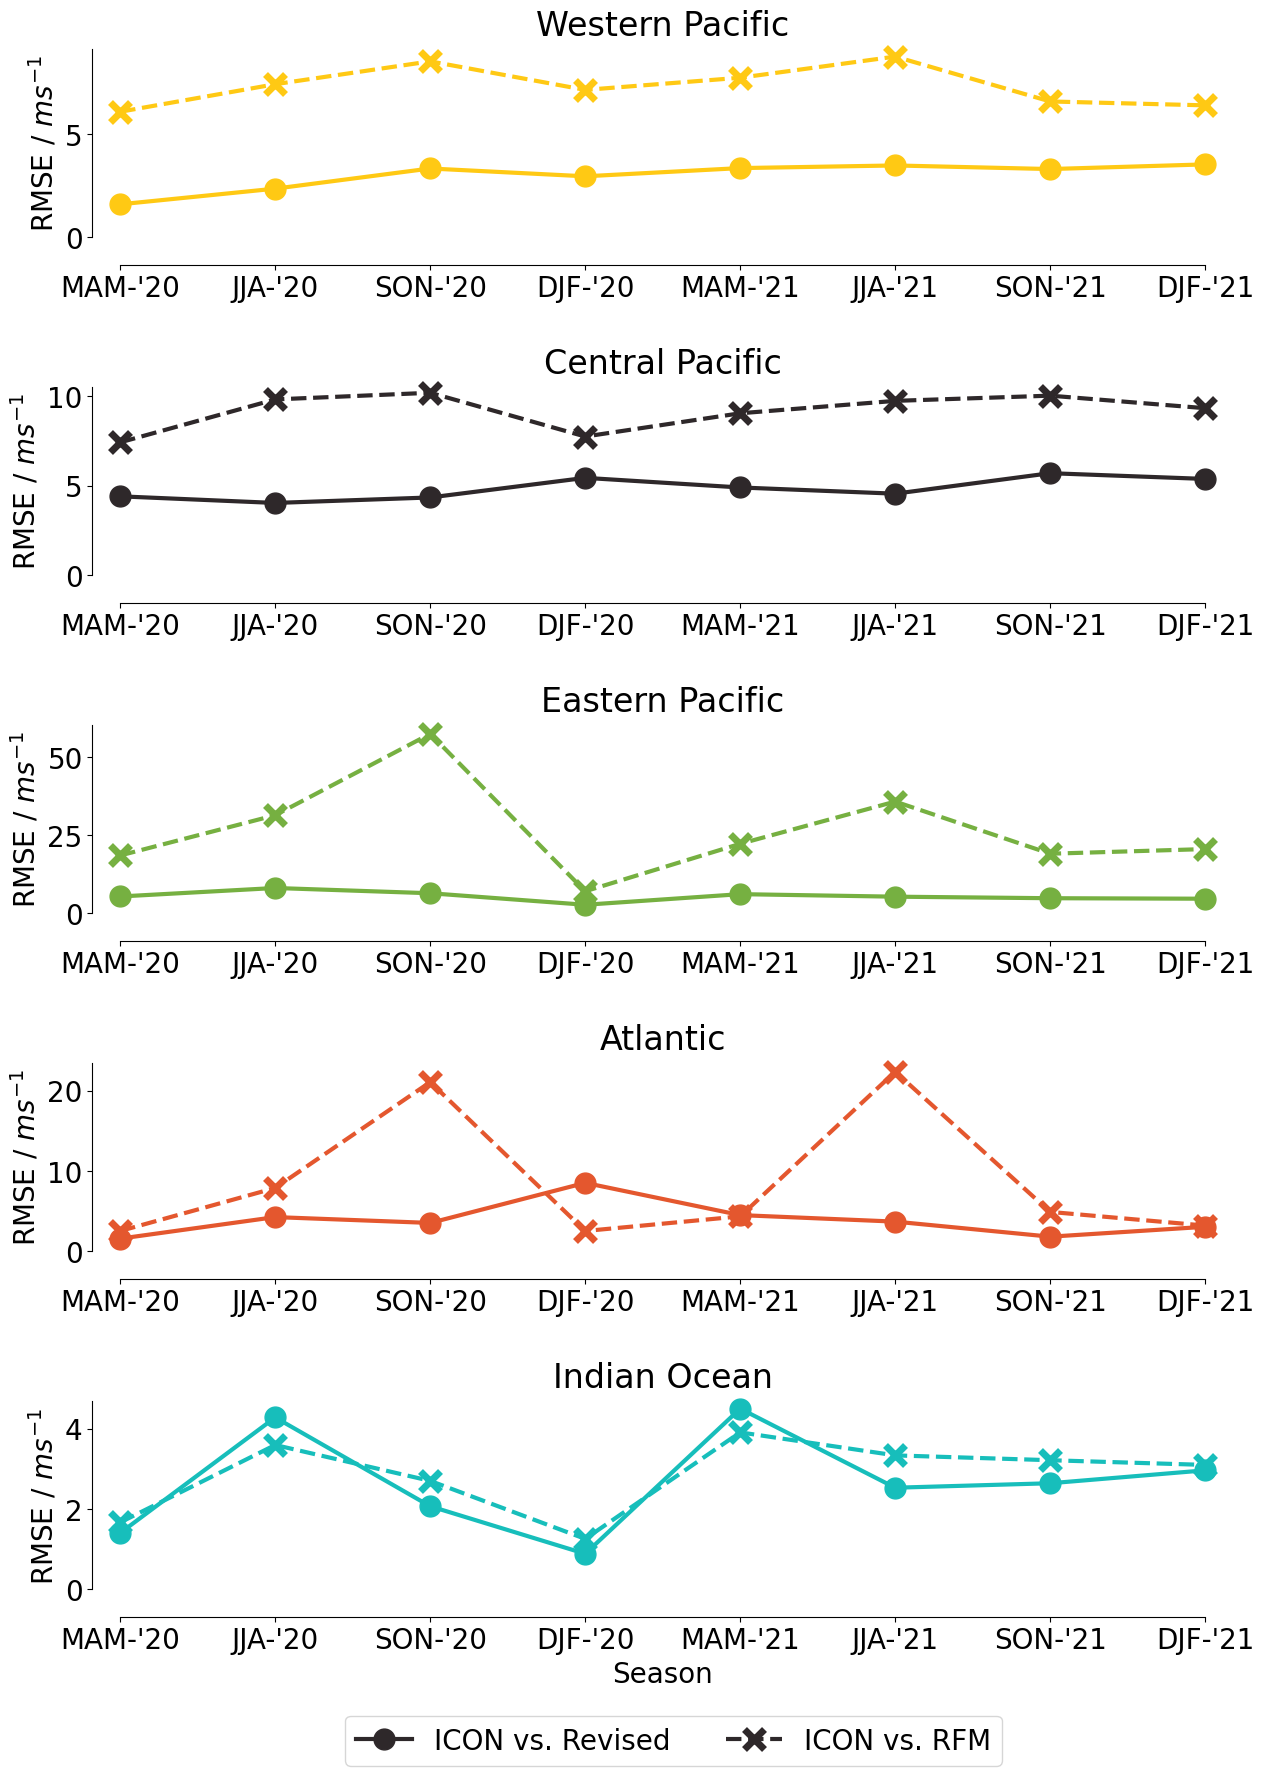

In [15]:
fig = plt.figure(figsize=(14,20), facecolor='w', edgecolor='k')
G = gridspec.GridSpec(5,1, hspace=0.8)

ax1 = plt.subplot(G[0,0])

ax1.plot(wPcf_zonal_wind_pattern_ICON_vs_WIN, marker='o', ms=15, lw=3, color='#FFC914', label='Western Pacific', clip_on=False, zorder=12)
ax1.plot(wPcf_zonal_wind_pattern_ICON_vs_RFM, marker='x', ls='dashed', ms=15, markeredgewidth=5, lw=3, color='#FFC914', label='Western Pacific', clip_on=False, zorder=12)

ax1.set_title('Western Pacific', pad=10)
ax1.spines[['top','right']].set_visible(False)
ax1.spines[['bottom', 'left']].set_position(('outward',20))
ax1.set_xlim(0,7)
ax1.set_xticks(range(8))
ax1.set_xticklabels(["MAM-'20", "JJA-'20", "SON-'20", "DJF-'20", "MAM-'21", "JJA-'21", "SON-'21", "DJF-'21"])
ax1.set_ylim(bottom=0)
#ax1.set_yticks([0,500,1000,1500,2000,2500])
#ax1.set_xlabel('Season')
ax1.set_ylabel(r'RMSE / $ms^{-1}$')

ax2 = plt.subplot(G[1,0])

ax2.plot(cPcf_zonal_wind_pattern_ICON_vs_WIN, marker='o', ms=15, lw=3, color='#2E282A', label='ICON vs. Revised', clip_on=False, zorder=14)
ax2.plot(cPcf_zonal_wind_pattern_ICON_vs_RFM, marker='x', ls='dashed', ms=15, markeredgewidth=5, lw=3, color='#2E282A', label='ICON vs. RFM', clip_on=False, zorder=14)

ax2.set_title('Central Pacific', pad=10)
ax2.spines[['top','right']].set_visible(False)
ax2.spines[['bottom', 'left']].set_position(('outward',20))
ax2.set_xlim(0,7)
ax2.set_xticks(range(8))
ax2.set_xticklabels(["MAM-'20", "JJA-'20", "SON-'20", "DJF-'20", "MAM-'21", "JJA-'21", "SON-'21", "DJF-'21"])
ax2.set_ylim(bottom=0)
#ax2.set_yticks([0,500,1000,1500,2000,2500])
#ax2.set_xlabel('Season')
ax2.set_ylabel(r'RMSE / $ms^{-1}$')

ax1 = plt.subplot(G[2,0])

ax1.plot(ePcf_meridional_wind_pattern_ICON_vs_WIN, marker='o', ms=15, lw=3, color='#76B041', label='Eastern Pacific', clip_on=False)
ax1.plot(ePcf_meridional_wind_pattern_ICON_vs_RFM, marker='x', ls='dashed', ms=15, markeredgewidth=5, lw=3, color='#76B041', label='Eastern Pacific', clip_on=False)

ax1.set_title('Eastern Pacific', pad=10)
ax1.spines[['top','right']].set_visible(False)
ax1.spines[['bottom', 'left']].set_position(('outward',20))
ax1.set_xlim(0,7)
ax1.set_xticks(range(8))
ax1.set_xticklabels(["MAM-'20", "JJA-'20", "SON-'20", "DJF-'20", "MAM-'21", "JJA-'21", "SON-'21", "DJF-'21"])
ax1.set_ylim(bottom=0)
#ax1.set_yticks([0,500,1000,1500,2000,2500])
#ax1.set_xlabel('Season')
ax1.set_ylabel(r'RMSE / $ms^{-1}$')


ax1 = plt.subplot(G[3,0])

ax1.plot(ATL_meridional_wind_pattern_ICON_vs_WIN, marker='o', ms=15, lw=3, color='#E4572E', label='Atlantic', clip_on=False)
ax1.plot(ATL_meridional_wind_pattern_ICON_vs_RFM, marker='x', ls='dashed', ms=15, markeredgewidth=5, lw=3, color='#E4572E', label='Atlantic', clip_on=False)

ax1.set_title('Atlantic', pad=10)
ax1.spines[['top','right']].set_visible(False)
ax1.spines[['bottom', 'left']].set_position(('outward',20))
ax1.set_xlim(0,7)
ax1.set_xticks(range(8))
ax1.set_xticklabels(["MAM-'20", "JJA-'20", "SON-'20", "DJF-'20", "MAM-'21", "JJA-'21", "SON-'21", "DJF-'21"])
ax1.set_ylim(bottom=0)
#ax1.set_yticks([0,500,1000,1500,2000,2500])
#ax1.set_xlabel('Season')
ax1.set_ylabel(r'RMSE / $ms^{-1}$')

ax1 = plt.subplot(G[4,0])

ax1.plot(IO_zonal_wind_pattern_ICON_vs_WIN, marker='o', ms=15, lw=3, color='#17BEBB', label='Indian Ocean', zorder=10, clip_on=False)
ax1.plot(IO_zonal_wind_pattern_ICON_vs_RFM, marker='x', ls='dashed', ms=15, markeredgewidth=5, lw=3, color='#17BEBB', label='Indian Ocean', zorder=10, clip_on=False)

ax1.set_title('Indian Ocean', pad=10)
ax1.spines[['top','right']].set_visible(False)
ax1.spines[['bottom', 'left']].set_position(('outward',20))
ax1.set_xlim(0,7)
ax1.set_xticks(range(8))
ax1.set_xticklabels(["MAM-'20", "JJA-'20", "SON-'20", "DJF-'20", "MAM-'21", "JJA-'21", "SON-'21", "DJF-'21"])
ax1.set_ylim(bottom=0)
#ax1.set_yticks([0,500,1000,1500,2000,2500])
ax1.set_xlabel('Season')
ax1.set_ylabel(r'RMSE / $ms^{-1}$')

ax2.legend(loc='upper center', bbox_to_anchor=(0.51,-6), fancybox=True, shadow=False, ncol=5)

plt.tight_layout()

filename = f'fig_09_revised_sorted_by_wind_pattern.pdf'
filepath = 'figs_review/'
plt.savefig(filepath + filename, facecolor='white', bbox_inches='tight', dpi=400)

plt.show()